In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

In [32]:
data = np.loadtxt('logistic_regression_data.csv', delimiter = ',', dtype = np.float64)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

In [33]:
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [34]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

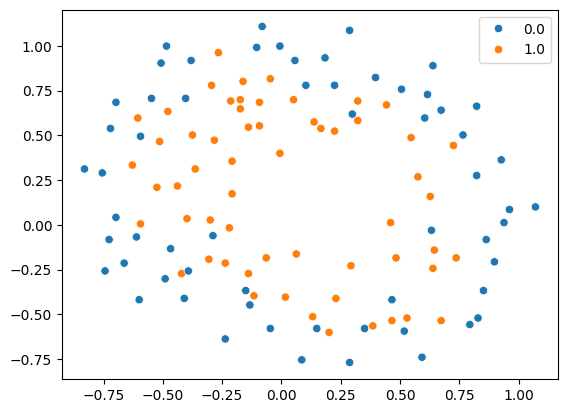

In [35]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.show()

In [36]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [38]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y)
    return cos

In [39]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (h - y))/len(y)
    return grad

In [40]:
def expand_feature(x1, x2, power = 2):
    #expand a 2D feature matrix to polynimial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape(-1, 1), axis = 1)
    return new_x

In [41]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) > 0.5).flatten()

In [42]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y))/m
        costs.append(loss(theta, X, y))
    return theta, costs

In [43]:
def logistic_regression(X, y, power = 2, alpha = 0.01, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [44]:
power, num_iters = 20, 20000
predicted, theta, costs = logistic_regression(X, y, power = power, alpha = 0.6, num_iters = num_iters)

In [45]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))

The accuracy is 85.59 %


C:\Users\nikhi\AppData\Local\Temp\ipykernel_12180\3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


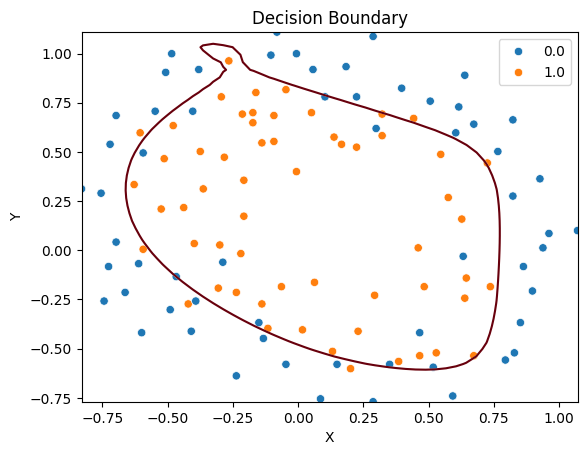

In [46]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Regularization

In [20]:
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y) + lam * np.sum(theta1 * theta1)/len(y)
    return cos

In [21]:
def grad_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta1)/len(y)
    return grad

In [22]:
def gradient_descent_reg(X, y, theta, alpha, lam = 0, num_iters = 100):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()  
        theta1[0] = 0  
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1)/m
        costs.append(cost_reg(theta, X, y))
    return theta, costs

In [53]:
def logistic_regression_reg(X, y, power = 2, alpha = 0.01, lam = 0, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

In [54]:
power, num_iters = 20, 20000
lam = 1
predicted, theta, costs = logistic_regression_reg(X, y, power = power, alpha = 0.6, lam = lam, num_iters = num_iters)

In [55]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))

The accuracy is 82.20 %


C:\Users\nikhi\AppData\Local\Temp\ipykernel_12180\3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


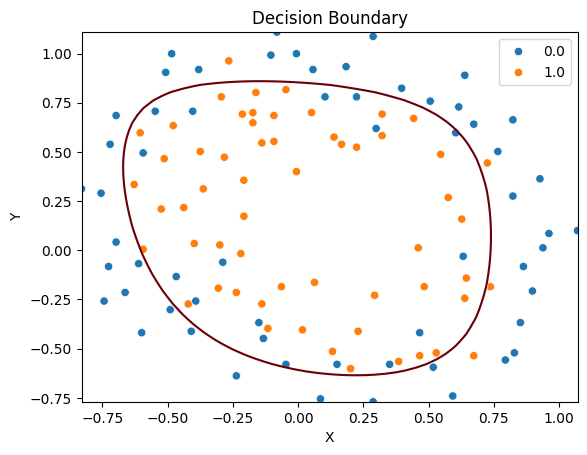

In [56]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()